# Samila Demo

### Version : 1.5
---

In [1]:
import sys
try:
  import google.colab
  !{sys.executable} -m pip -q -q install samila
except:
  pass

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.6/71.6 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 608.6/608.6 kB 15.4 MB/s eta 0:00:00


In [2]:
import matplotlib.pyplot as plt
import random
import math
from samila import GenerativeImage, Projection, Marker, GenerateMode

## Magic
If we create a `GenerativeImage` instance with no input parameters, we will get a plot generated from two random equations.

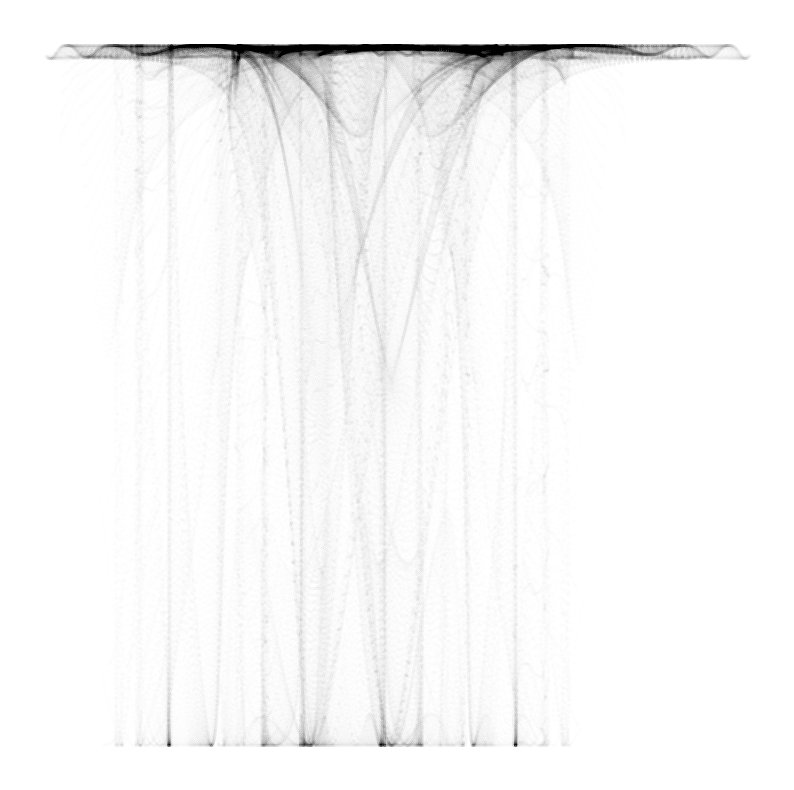

In [3]:
g1 = GenerativeImage()
g1.generate()
g1.plot()
plt.show()

## Assigning Functions
By defining `f1` and `f2`, we can control the general shape of the plot.

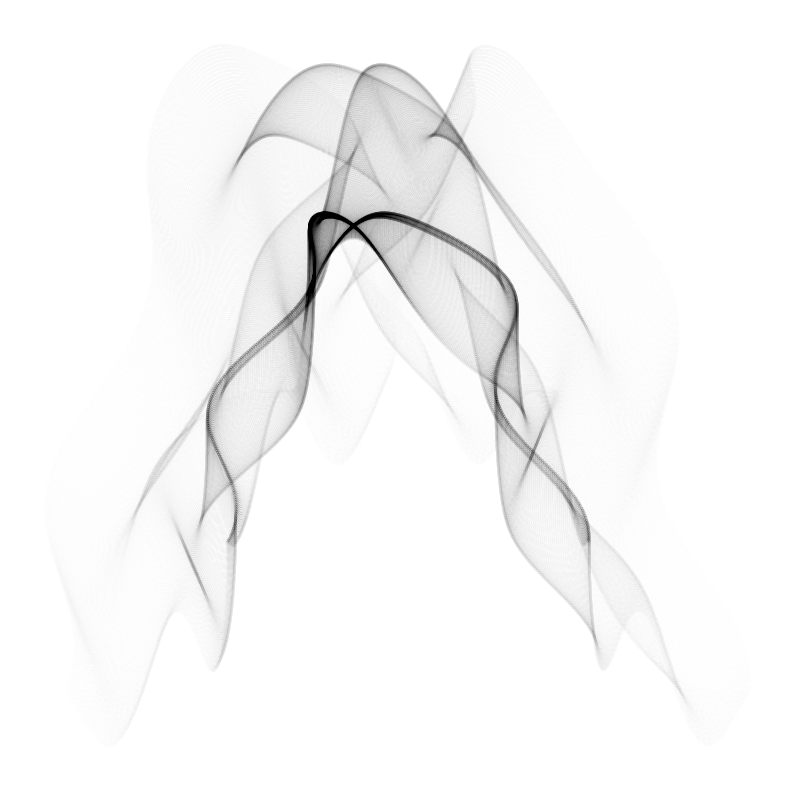

In [4]:
def f1(x, y):
    result = random.uniform(-1,1) * x**2  - math.sin(y**2) + abs(y-x)
    return result

def f2(x, y):
    result = random.uniform(-1,1) * y**3 - math.cos(x**2) + 2*x
    return result

g2 = GenerativeImage(f1, f2)
g2.generate()
g2.plot()
plt.show()

## Generation Mode

We have the option to select from various generation modes.

ℹ️ The avaliable modes are `F1_VS_F2`, `F2_VS_F1`, `F1_VS_INDEX`, `F2_VS_INDEX`, `INDEX_VS_F1`, `INDEX_VS_F2`, `F1_VS_X1`, `F1_VS_X2`, `F2_VS_X1`, `F2_VS_X2`, `X1_VS_F1`, `X1_VS_F2`, `X2_VS_F1`, `X2_VS_F2`, `F1F2_VS_F1`, `F1F2_VS_F2` and `RANDOM`

ℹ️ Default mode is `F1_VS_F2`

GenerateMode.DEFAULT


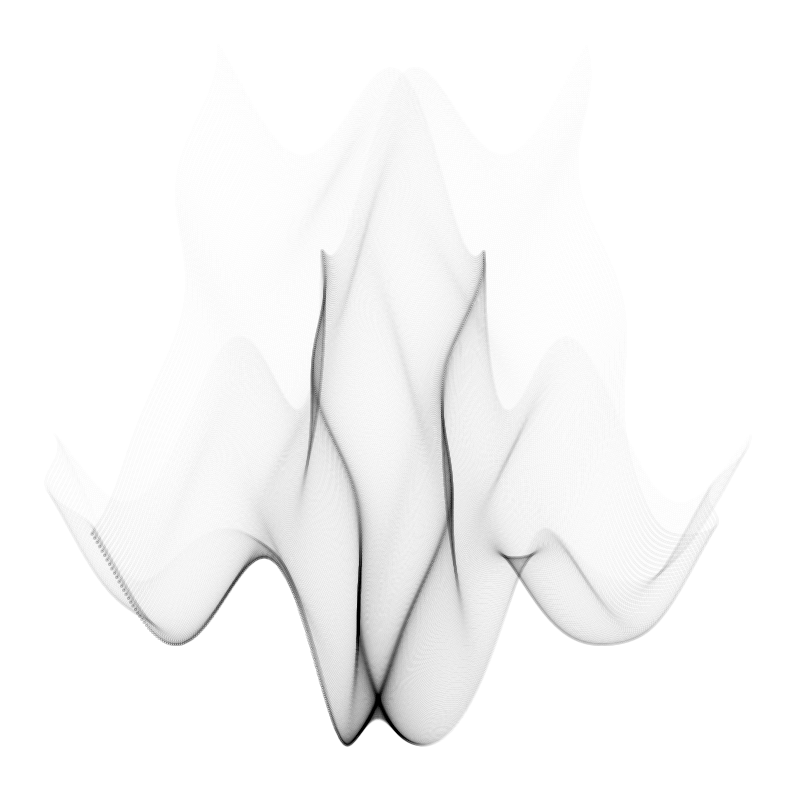

GenerateMode.F2_VS_F1


In [ ]:
g2 = GenerativeImage(f1, f2)

for mode in list(GenerateMode):
    print(mode)
    g2.generate(mode=mode)
    g2.plot()
    plt.show()
    plt.close()

## Projection
We can use the `projection` attribute to define the coordinate system to transform our functions.

ℹ️ The avaliable projections are `RECTILINEAR`, `POLAR`, `AITOFF`, `HAMMER`, `LAMBERT`, `MOLLWEIDE` and `RANDOM`

ℹ️ Default projection is `RECTILINEAR`

In [ ]:
g2 = GenerativeImage(f1, f2)
g2.generate()

for projection in list(Projection):
    print(projection)
    g2.plot(projection=projection)
    plt.show()
    plt.close()

## Marker
We can use the `marker` attribute to change the plotting marker.

ℹ️ The available markers are `POINT`, `PIXEL`, `CIRCLE`, `TRIANGLE_DOWN`, `TRIANGLE_UP`, `TRIANGLE_LEFT`, `TRIANGLE_RIGHT`, `TRI_DOWN`, `TRI_UP`, `TRI_LEFT`, `TRI_RIGHT`, `OCTAGON`, `SQUARE`, `PENTAGON`, `PLUS`, `PLUS_FILLED`, `STAR`, `HEXAGON_VERTICAL`, `HEXAGON_HORIZONTAL`, `X`, `X_FILLED`, `DIAMOND`, `DIAMON_THIN`, `VLINE`, `HLINE` and `RANDOM`

ℹ️ Default marker is `POINT`

In [ ]:
g2 = GenerativeImage(f1, f2)
g2.generate()

for m in list(Marker):
    print(m)
    g2.plot(marker=m, spot_size=100)
    plt.show()
    plt.close()

## Rotation
You can even rotate your art by using `rotation` parameter. Enter your desired rotation for the image in degrees and you will have it.

ℹ️ Default rotation is `0`

In [ ]:
g = GenerativeImage(f1, f2)
g.generate()
g.plot(rotation=45)

## Range

Control the range over which the input values span.

ℹ️ Default range is $(-\pi, \pi)$

In [ ]:
g2 = GenerativeImage(f1, f2)
g2.generate(start=-1.5*math.pi, step=0.007, stop=0)
g2.plot(projection=Projection.POLAR)
plt.show()

## Color

We can assign colors for both the background as well as the line.


ℹ️ Default color is `black`

ℹ️ Default background-color is `white`

In [ ]:
g2 = GenerativeImage(f1, f2)
g2.generate()
g2.plot(color="maroon", bgcolor="antiquewhite", projection=Projection.POLAR)
plt.show()

ℹ️ Supported colors are available in `VALID_COLORS` list

ℹ️ `color` and `bgcolor` parameters supported formats:

    1. Color name (example: `color="yellow"`)
    2. RGB/RGBA (example: `color=(0.1,0.1,0.1)`, `color=(0.1,0.1,0.1,0.1)`)
    3. Hex (example: `color="#eeefff"`)
    4. Random (example: `color="random"`)
    5. Complement (example: `color="complement", bgcolor="blue"`)
    6. Transparent (example: `bgcolor="transparent"`)
    7. List (example: `color=["black", "#fffeef",...]`)

⚠️ **Transparent** mode is only available for background

⚠️ **List** mode is only available for color

⚠️ In **List** mode, the length of this list must be equal to the lengths of data1 and data2

### Point Color

You can make your custom color map and use it in Samila.

In [ ]:
colorarray = [
    [0.7, 0.2, 0.2, 1],
    [0.6, 0.3, 0.2, 1],
    "black",
    [0.4, 0.4, 0.3, 1],
    [0.3, 0.4, 0.4, 1],
    "#ff2561"]
g2.generate()
g2.plot(cmap=colorarray, color=g2.data2, projection=Projection.POLAR)
plt.show()

## Spot Size

We can also change the size of the plot marker.

ℹ️ Default spot-size is `0.01`

In [ ]:
g2 = GenerativeImage(f1, f2)
g2.generate()
g2.plot(color="yellow", bgcolor="darkslategray", spot_size=0.25)
plt.show()

## Random Seeds
If we do not pass in a seed when calling `generate`, a random seed will be created for us.

Passing this seed into `generate` will guarantee plot reproducibility.

In [ ]:
seed = g2.seed
print(seed)

In [ ]:
g2 = GenerativeImage(f1, f2)
g2.generate(seed)
g2.plot(color="yellow", bgcolor="darkslategray", spot_size=0.05)
plt.show()

## Saving Images

Save generated images.

Use the `depth` attribute to increase the resolution.

In [ ]:
g2.save_image(file_adr="test.png")

In [ ]:
g2.save_image(file_adr="test_high_res.png", depth=3)

## Saving Data

Save generated image data.

It can then be loaded into a `GenerativeImage` instance.

In [ ]:
g2.save_data(file_adr="data.json")

In [ ]:
g2 = GenerativeImage(data=open('data.json', 'r'))
g2.plot()

## Saving Config

Save generated image config. It contains string formats of functions which is also human readable.

It can then be loaded into a `GenerativeImage` instance.

In [ ]:
g1.save_config(file_adr="config.json")

In [ ]:
g1 = GenerativeImage(config=open('config.json', 'r'))
g1.generate()
g1.plot()

## NFT.storage

Upload generated image directly to [NFT.storage](https://nft.storage).

In [ ]:
g1.nft_storage(api_key="YOUR_API_KEY")

In [ ]:
g1.nft_storage(api_key="YOUR_API_KEY", timeout=5000)

You can also upload your config/data to nft storage as follows:

In [ ]:
g1.nft_storage(api_key="YOUR_API_KEY", upload_config=True)

In [ ]:
g1.nft_storage(api_key="YOUR_API_KEY", upload_data=True)

⚠️ This method is deprecated and may be removed in future releases

ℹ️ Default timeout is `3000` seconds

ℹ️ Default gateway is `IPFS_IO`